# Imports

In [119]:
!pip install yfinance # install yfinance package to easily pull data

In [120]:
# Created by Maximo Xavier DeLeon on 06/05/2021
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

In [121]:
# reused from my other repo

# input a list of tickers alongside a start & stop date
# a dictionary of nested dataframes will be returned
# index the the price data for a ticker by using the desired ticker as a dictionary key
def get_close_prices_yahoo(tickers, start_date, stop_date):
  '''
  get close prices for securities listed in asset_list
  :param asset_list:
  :return:
  '''
  asset_dict = {}
  for asset in tickers:
    df = pd.DataFrame()
    current_asset = yf.Ticker(asset)
    ohclv_bars = current_asset.history(start=start_date, end=stop_date)
    asset_dict[asset] = ohclv_bars
  return asset_dict

# Defining Tickers and Pulling Close Prices

In [122]:
# working on google colab and don't want to always upload a csv file so I manually listed the tickers of what we trade
coins_energy_tickers = ['USO','BNO','UGA','UNG',]
coins_agriculture_tickers = ['CORN','COW','SOYB','WEAT','JO','SGG','BAL']
coins_metals_tickers = ['IAU','SLV','CPER']

coins_portfolio_tickers = coins_energy_tickers + coins_agriculture_tickers + coins_metals_tickers # make a ticker list

In [123]:
start = '2019-1-4' # date we start getting the price data 
stop = '2021-6-5' # date we stop getting the price data
coins_portfolio_dict = get_close_prices_yahoo(coins_portfolio_tickers,start_date=start, stop_date=stop) # fetch the data from yahoo

coins_portfolio = pd.DataFrame() # create an empty dataframe

for ticker in coins_portfolio_dict.keys(): # use a for loop to add in each ticker's close price
  coins_portfolio[ticker] = (coins_portfolio_dict[ticker])['Close']

# Full Portfolio Correlation Matrix Heatmap

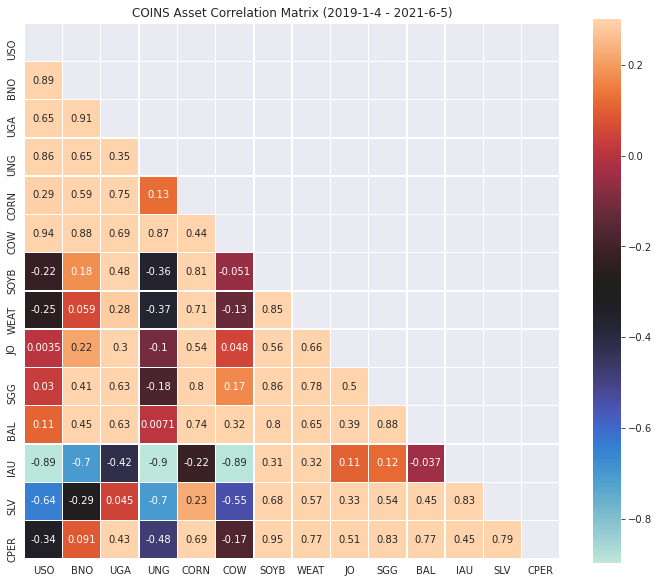

In [124]:
# full portfolio correlation heatmap
coins_portfolio_correlation_matrix = coins_portfolio.corr()
mask = np.zeros_like(coins_portfolio_correlation_matrix)
mask[np.triu_indices_from(mask)] = True
with sn.axes_style("dark"):
    f, ax = plt.subplots(figsize=(12, 10))
    ax.set_title('COINS Asset Correlation Matrix ('+start+' - ' +stop+')')
    ax = sn.heatmap(coins_portfolio_correlation_matrix, annot=True, cmap="icefire",mask=mask, vmax=.3, square=True, linewidths=.5)

# Energy Division Correlation Matrix Heatmap

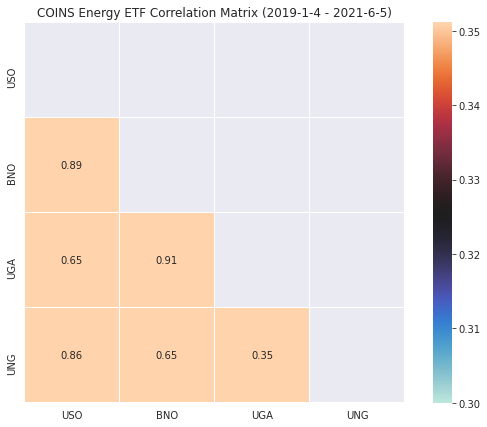

In [125]:
# Energy division correlation heatmap
coins_energy_portfolio_correlation_matrix = coins_portfolio[coins_energy_tickers].corr()
mask = np.zeros_like(coins_energy_portfolio_correlation_matrix)
mask[np.triu_indices_from(mask)] = True
with sn.axes_style("dark"):
    f, ax1 = plt.subplots(figsize=(10, 7))
    ax1.set_title('COINS Energy ETF Correlation Matrix ('+start+' - ' +stop+')')
    ax1 = sn.heatmap(coins_energy_portfolio_correlation_matrix, annot=True, cmap="icefire",mask=mask, vmax=.3, square=True, linewidths=.5)

# Agriculture Division Correlation Matrix Heatmap

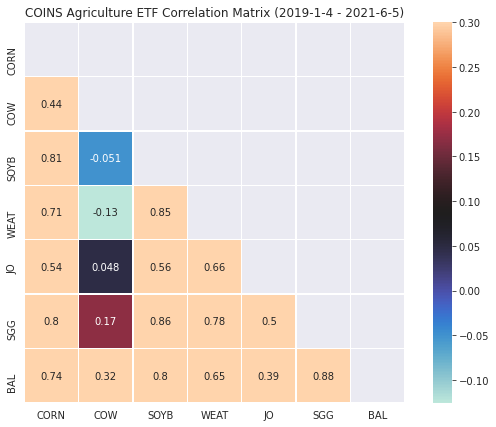

In [126]:
# Agriculture division correlation heatmap
coins_agriculture_portfolio_correlation_matrix = coins_portfolio[coins_agriculture_tickers].corr()
mask = np.zeros_like(coins_agriculture_portfolio_correlation_matrix)
mask[np.triu_indices_from(mask)] = True
with sn.axes_style("dark"):
    f, ax2 = plt.subplots(figsize=(10, 7))
    ax2.set_title('COINS Agriculture ETF Correlation Matrix ('+start+' - ' +stop+')')
    ax2 = sn.heatmap(coins_agriculture_portfolio_correlation_matrix, annot=True, cmap="icefire",mask=mask, vmax=.3, square=True, linewidths=.5)

# Metals Division Correlation Matrix Heatmap

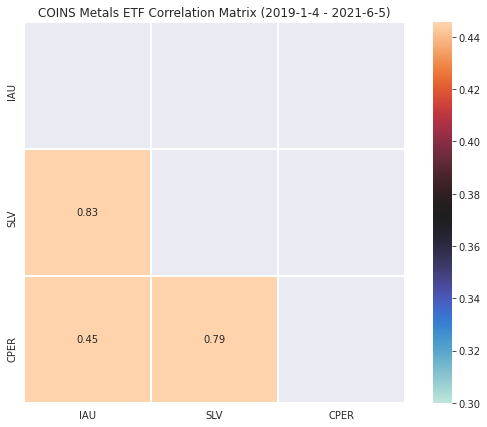

In [127]:
# Metals division correlation matrix
coins_metals_portfolio_correlation_matrix = coins_portfolio[coins_metals_tickers].corr()
mask = np.zeros_like(coins_metals_portfolio_correlation_matrix)
mask[np.triu_indices_from(mask)] = True
with sn.axes_style("dark"):
    f, ax3 = plt.subplots(figsize=(10, 7))
    ax3.set_title('COINS Metals ETF Correlation Matrix ('+start+' - ' +stop+')')
    ax3 = sn.heatmap(coins_metals_portfolio_correlation_matrix, annot=True, cmap="icefire",mask=mask, vmax=.3, square=True, linewidths=.5)